In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving clean_dataset.csv to clean_dataset.csv


In [ ]:
# 1. Data Loading and Initial Exploration
file_path = "clean_dataset.csv"
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    df = None  # Ensure df is defined even if loading fails
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    df = None

if df is not None:
    print("\nInitial Data Overview:")
    print(df.head())
    print("\nDataFrame Information:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())


Data loaded successfully.

Initial Data Overview:
   Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202   

In [ ]:
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


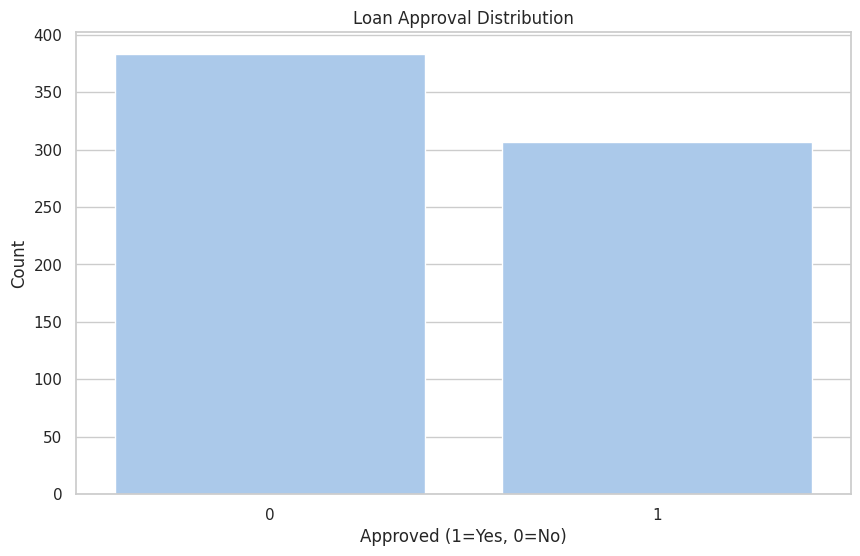

In [ ]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)
sns.countplot(data=df, x='Approved')
plt.title("Loan Approval Distribution")
plt.xlabel("Approved (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()


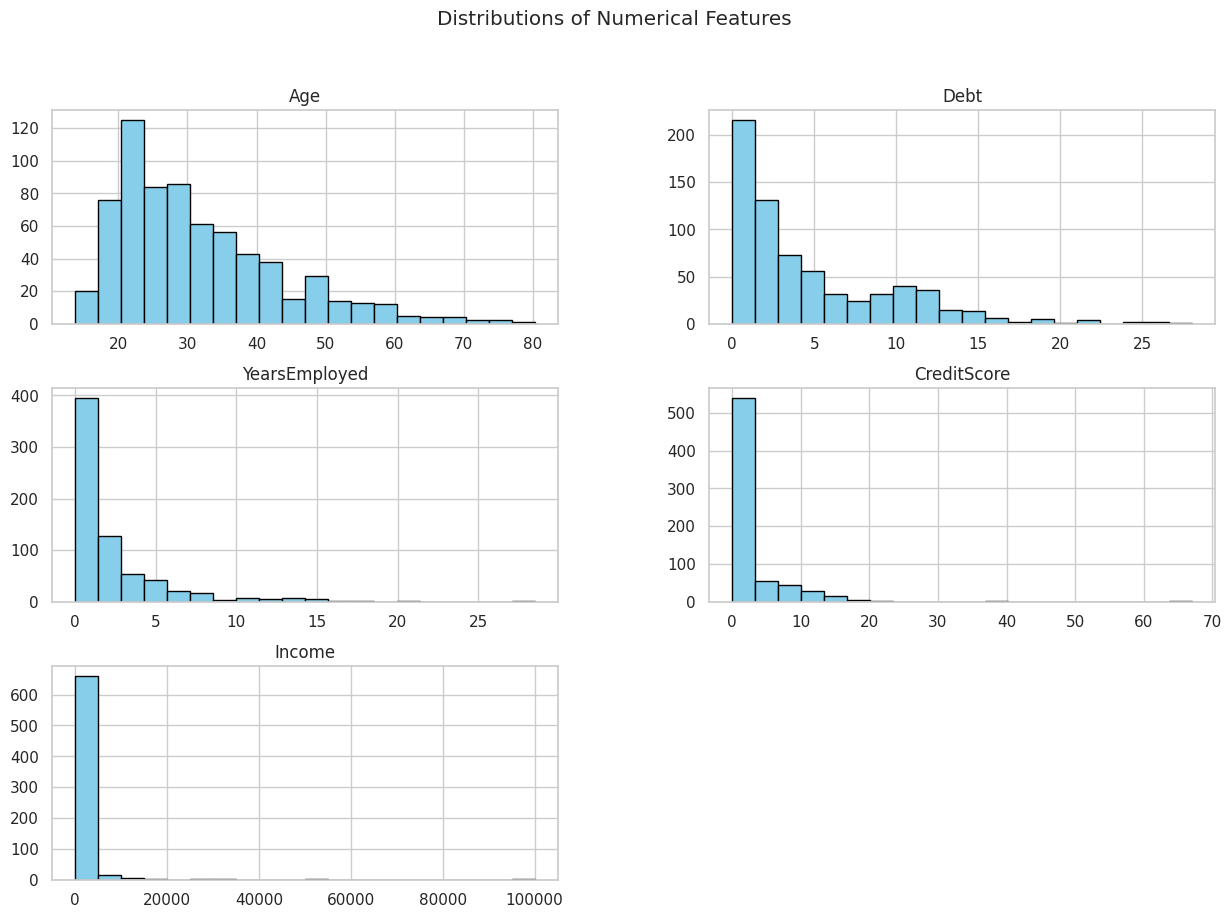

In [ ]:
num_cols = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
df[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features")
plt.show()

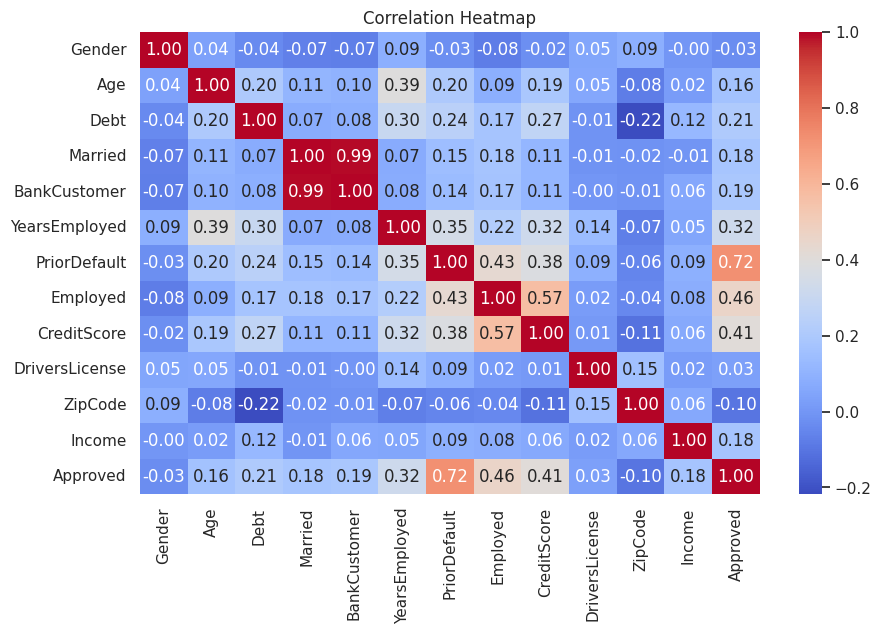

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
    # 2. Data Preprocessing
    if df is not None:
        try:
            print("\nNumber of duplicate rows before removal:", df.duplicated().sum())
            df = df.drop_duplicates()
            print("Number of duplicate rows after removal:", df.duplicated().sum())

            print("\nMissing values before handling:")
            print(df.isnull().sum())
            for col in df.columns:
                if df[col].dtype in ['int64', 'float64']:
                    df[col] = df[col].fillna(df[col].mean())
                else:
                    df[col] = df[col].fillna(df[col].mode()[0])
            print("\nMissing values after handling:")
            print(df.isnull().sum())

            categorical_cols = df.select_dtypes(include=['object', 'category']).columns
            print("\nCategorical columns to be encoded:", categorical_cols)
            if (len(categorical_cols) > 0):
                le = LabelEncoder()
                for col in categorical_cols:
                    df[col] = le.fit_transform(df[col])
                print("\nDataFrame after label encoding:")
                print(df.head())
            else:
                print("\nNo categorical columns to encode.")

            numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
            print("\nNumerical columns to be scaled:", numerical_cols)
            if (len(numerical_cols) > 0):
                scaler = StandardScaler()
                df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
                print("\nDataFrame after standard scaling:")
                print(df.head())
            else:
                print("\nNo numerical columns to scale.")
        except Exception as e:
            print(f"An error occurred during preprocessing: {e}")
            df_preprocessed = None  # Ensure df_preprocessed is defined on error
        else:
            df_preprocessed = df
    else:
        df_preprocessed = None


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0

Missing values before handling:
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

Missing values after handling:
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

Categorical columns to be encoded: Index(['Industry', 'Ethnicity', 'Citizen'], dtype='object')

DataFrame after label encoding:
   Gender    Age   Debt  Married  BankCustomer  Indust

In [ ]:
# 3. Data Splitting
if df_preprocessed is not None:
    try:
        X = df_preprocessed.drop('Approved', axis=1)
        y = df_preprocessed['Approved']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        y_train = y_train.astype(int)
        y_test = y_test.astype(int)

        print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples")
    except Exception as e:
        print(f"An error occurred during data splitting: {e}")
        X_train, X_test, y_train, y_test = None, None, None, None
else:
    X_train, X_test, y_train, y_test = None, None, None, None


Data split: 552 training samples, 138 testing samples


In [ ]:
# 4. Model Training and Validation
if X_train is not None and y_train is not None and X_test is not None and y_test is not None:
    try:
        models = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
            'Random Forest': RandomForestClassifier(random_state=42),
            'SVM': SVC(probability=True, random_state=42),
        }
        results = {}

        print(f"\nPerforming 5-fold cross-validation...")
        for name, model in models.items():
            print(f"\nTraining and validating {name}...")
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            fold_accuracies = []
            fold_precisions = []
            fold_recalls = []
            fold_f1_scores = []
            fold_roc_auc_scores = []

            for train_index, val_index in kf.split(X_train, y_train):
                X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
                y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

                model.fit(X_train_fold, y_train_fold)
                y_pred_fold = model.predict(X_val_fold)

                fold_accuracies.append(accuracy_score(y_val_fold, y_pred_fold))
                fold_precisions.append(precision_score(y_val_fold, y_pred_fold))
                fold_recalls.append(recall_score(y_val_fold, y_pred_fold))
                fold_f1_scores.append(f1_score(y_val_fold, y_pred_fold))

                y_pred_proba_fold = model.predict_proba(X_val_fold)[:, 1]
                fold_roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_proba_fold))

            # Assigning model and metrics to the results dictionary
            results[name] = {
                'model': model,
                'cv_accuracy': np.mean(fold_accuracies),
                'cv_precision': np.mean(fold_precisions),
                'cv_recall': np.mean(fold_recalls),
                'cv_f1_score': np.mean(fold_f1_scores),
                'cv_roc_auc': np.mean(fold_roc_auc_scores)
            }
            print(f"{name} Cross-Validation Accuracy: {results[name]['cv_accuracy']:.4f}")

        print("\nTraining Ensemble Bagging Classifier...")
        ensemble_model = VotingClassifier(estimators=[
            ('lr', models['Logistic Regression']),
            ('rf', models['Random Forest']),
            ('svm', models['SVM'])
        ], voting='soft')

        ensemble_model.fit(X_train, y_train)
        y_pred_ensemble = ensemble_model.predict(X_test)

        # Add ensemble model results to the dictionary
        results['Ensemble Bagging'] = {
            'model': ensemble_model,
            'accuracy': accuracy_score(y_test, y_pred_ensemble),
            'precision': precision_score(y_test, y_pred_ensemble),
            'recall': recall_score(y_test, y_pred_ensemble),
            'f1_score': f1_score(y_test, y_pred_ensemble),
        }
        y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
        results['Ensemble Bagging']['roc_auc'] = roc_auc_score(y_test, y_pred_proba_ensemble)

        print("Ensemble Bagging trained.")
        print("\nModel Evaluation Completed!")

    except Exception as e:
        print(f"Error during model training and validation: {e}")
else:
    print("Training or testing data not found.")



Performing 5-fold cross-validation...

Training and validating Logistic Regression...
Logistic Regression Cross-Validation Accuracy: 0.8532

Training and validating Random Forest...
Random Forest Cross-Validation Accuracy: 0.8695

Training and validating SVM...
SVM Cross-Validation Accuracy: 0.8532

Training Ensemble Bagging Classifier...
Ensemble Bagging trained.

Model Evaluation Completed!



Model Evaluation on Test Set:

Logistic Regression Performance:
  Accuracy: 0.8261
  Precision: 0.8286
  Recall: 0.8286
  F1 Score: 0.8286
  ROC AUC: 0.8920

Random Forest Performance:
  Accuracy: 0.8768
  Precision: 0.9206
  Recall: 0.8286
  F1 Score: 0.8722
  ROC AUC: 0.9126

SVM Performance:
  Accuracy: 0.8406
  Precision: 0.8529
  Recall: 0.8286
  F1 Score: 0.8406
  ROC AUC: 0.8878

Ensemble Bagging Performance:
  Accuracy: 0.8406
  Precision: 0.8333
  Recall: 0.8571
  F1 Score: 0.8451
  ROC AUC: 0.9149


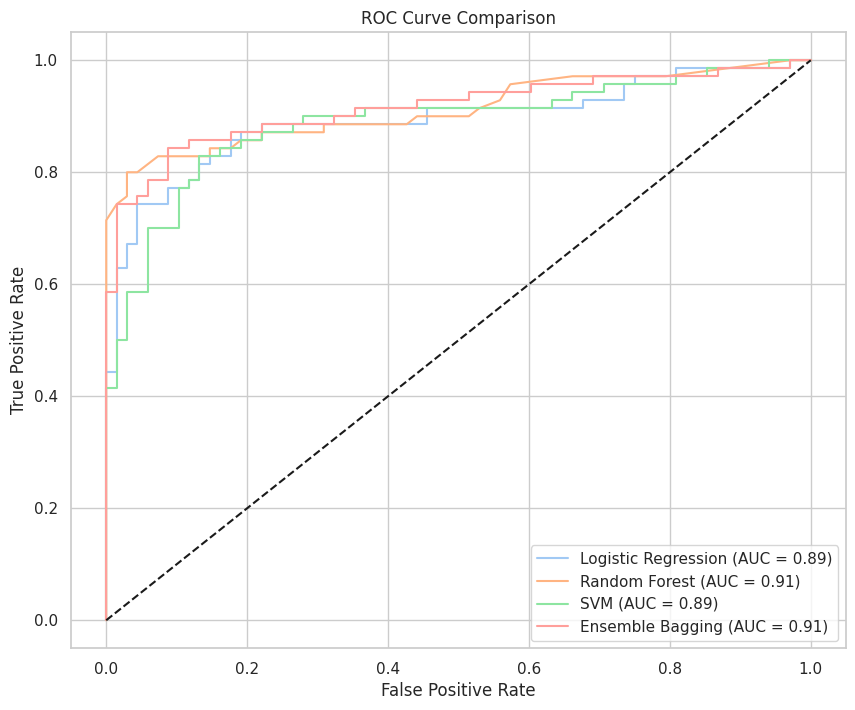

In [ ]:
# 5. Model Evaluation on Test Set
print("\nModel Evaluation on Test Set:")
plt.figure(figsize=(10, 8))

for name, model_data in results.items():
    try:
        model = model_data['model']

        # If metrics aren't already calculated
        if 'accuracy' not in model_data:
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            model_data['accuracy'] = accuracy
            model_data['precision'] = precision
            model_data['recall'] = recall
            model_data['f1_score'] = f1

        print(f"\n{name} Performance:")
        print(f"  Accuracy: {model_data['accuracy']:.4f}")
        print(f"  Precision: {model_data['precision']:.4f}")
        print(f"  Recall: {model_data['recall']:.4f}")
        print(f"  F1 Score: {model_data['f1_score']:.4f}")

        # ROC Curve and AUC
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
            print(f"  ROC AUC: {roc_auc:.4f}")
        elif name == 'Ensemble Bagging' and 'roc_auc' in model_data:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
            print(f"  ROC AUC: {roc_auc:.4f}")
        else:
            print("  ROC AUC: Not available for this model.")

    except KeyError as e:
        print(f"KeyError: {e} for model {name}. Model data might be incomplete.")

# Final ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
